# Lab1 Unconstrained Optimization

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

def plot_1d(x, y):
    plt.plot(x, y)
    plt.show()
    
def plot_2d(x,y,z, offset_):
    fig = plt.figure(figsize = [12,8])
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    ax.contour(x,y,z,10,zdir='z',offset=offset_)
    plt.show()

## One-dimensional case

We will analyse the function

$$
f(x) = x^3 - 2x + 2
$$

with respect to optimal points.

### 1. Plot

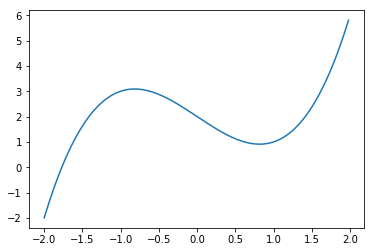

In [2]:
def func_1d(x):
    return(x**3 - 2*x + 2)

X = np.arange(-2, 2, 0.02)
Y = func_1d(X)

plot_1d(X,Y)

From the plot we see that the function has a local maximum close to $x = -1$ and a local minimum close to $x = 1$.

### 2. Analytical derivative

The analytical derivative of $f(x) = x^3 -2 x + 2$ is $f'(x) = 3x^2 - 2$. The derivative vanishes at

$$
x_{1,2}^* = \pm \sqrt{\frac{2}{3}}
$$

indicating that $f(x)$ has optimal points at these locations. Indeed, these points are local optima, but not global as can be seen in the plot. 

### 3. Taylor Expansion

The Taylor expansion up to second order around a local optimum $x^*$ has the following form

$$
f(x^* + d) = f(x^*) + \frac{1}{2} d^2 f''(x^*)
$$

since the first derivative vanishes. Here $d$ is a small perturbation. It is obvious that if $f''(x^*) > 0$ we have a local minimum, and for  $f''(x^*) < 0$ a local maximum.

For $x_1^* = \sqrt{2/3}$ we have $f''(x_1^*) = 6x_1^* > 0$, and hence a local minimum while for $x_2^* = -\sqrt{2/3}$ we have $f''(x_2^*) = 6x_2^* < 0$ a local maximum.

## Two-dimensional case

We have the function 

$$
f(x) = x_1^2 + x_2^2
$$

In [3]:
def func_2d(x1, x2):
    return(x1**2 + x2**2)

### 1. Plot

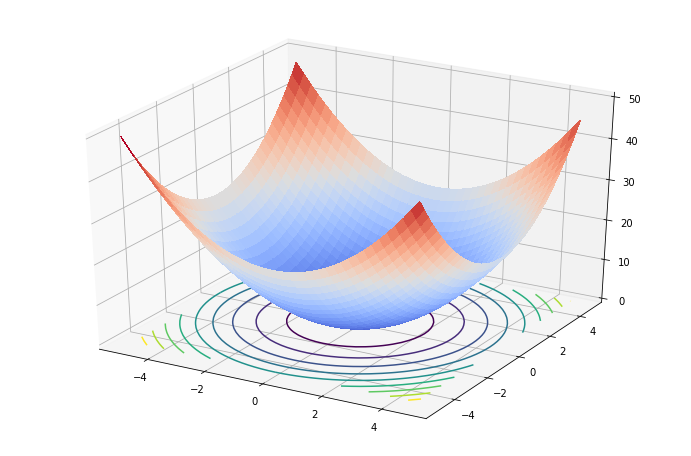

In [4]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = func_2d(X,Y)

plot_2d(X, Y, Z, 0)

### 2. Gradient

The gradient of f(x) is

$$
\nabla f(x) = 
\begin{bmatrix}
\frac{\partial}{\partial x_1} f(x) \\
\frac{\partial}{\partial x_2} f(x)
\end{bmatrix}
=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
$$

This fulfills $\nabla f(x^*) = 0$ for $x^* = (0,0)$ indicating local optimality at this point.

### 3. Taylor Expansion

The two-dimensional Taylor expansion around $x^*$ with perturbation $d \in \mathbb{R}^2$ is defined as 

$$
f(x^* + d) = f(x^*) + d^T \nabla f(x^*) + \frac{1}{2} d^T \nabla^2 f(x^*) d
$$

where the second term i.e. the gradient vanishes for a local optimum $x^*$.

The Hessian at the point $x^* = (0,0)$ is 

$$
\nabla^2 f(x^*) = 
\begin{bmatrix}
\frac{\partial}{\partial x_1} 2x_1 & \frac{\partial}{\partial x_1} 2x_2\\
\frac{\partial}{\partial x_2} 2x_1 & \frac{\partial}{\partial x_2} 2x_2
\end{bmatrix}
=
\begin{bmatrix}
2 & 0\\
0 & 2
\end{bmatrix}
$$


The eigenvalues $\lambda$ of this matrix are computed as follows

$$
det\bigg(
\begin{bmatrix}
2-\lambda & 0\\
0 & 2-\lambda
\end{bmatrix}
\bigg)
= 0,
$$

which yields $\lambda_{1,2} = 2$. Positive eigenvalues at $(0,0)$ indicate that the optimum is a minimum.

### 4. Additional functions with eigenvalues of different sign

In [5]:
def func_2d_A(x1, x2):
    return(-x1**2 -x2**2)

def func_2d_B(x1, x2):
    return(x1**2 -x2**2)

def func_2d_C(x1, x2):
    return(x1**2)

Let us first plot 

$$
f_A(x) = -x_1^2 - x_2^2 
$$

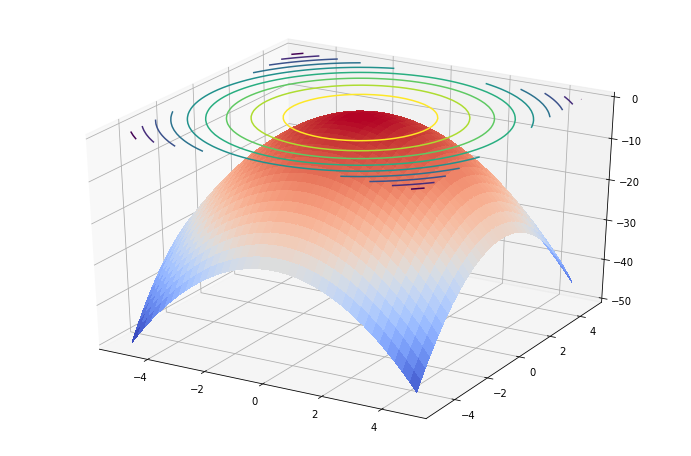

In [6]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y,indexing = 'ij')

plot_2d(X, Y, func_2d_A(X,Y), 0)

This function clearly has a maximum at $x^*=(0,0)$. From the eigenvalue analysis of the Hessian $\nabla^2 f_A(x^*)$ we find $\lambda_{1,2} = -2$ confirming the previous finding.

Let us next plot 

$$
f_B(x) = x_1^2 - x_2^2 
$$

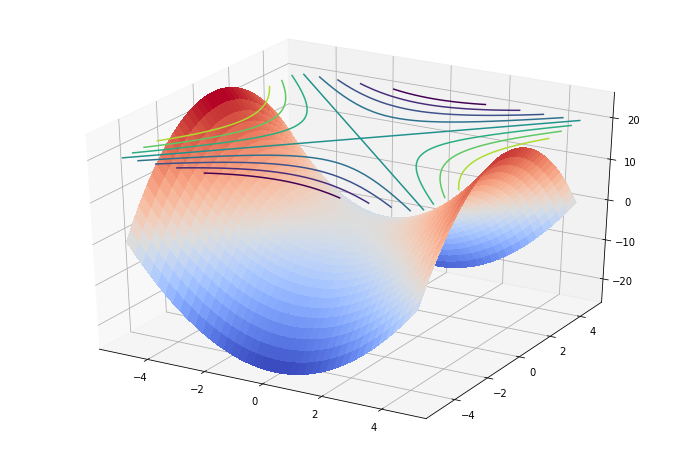

In [7]:
plot_2d(X, Y, func_2d_B(X,Y), 20)

As can be seen this function has a saddle point at $x^* = (0,0)$, which can be understood as a minimum in $x_1$ direction and a maximum in $x_2$ direction. The eigenvalues of the Hessian $\nabla^2 f_B(x^*)$ are $\lambda_1 = 2$ and $\lambda_2 = -2$. We conclude that for a two-dimensional function we have a saddle point when the eigenvalues of the Hessian have different sign, and both are $\neq 0$.

Lastly, let us plot 

$$
f_C(x) = x_1^2
$$

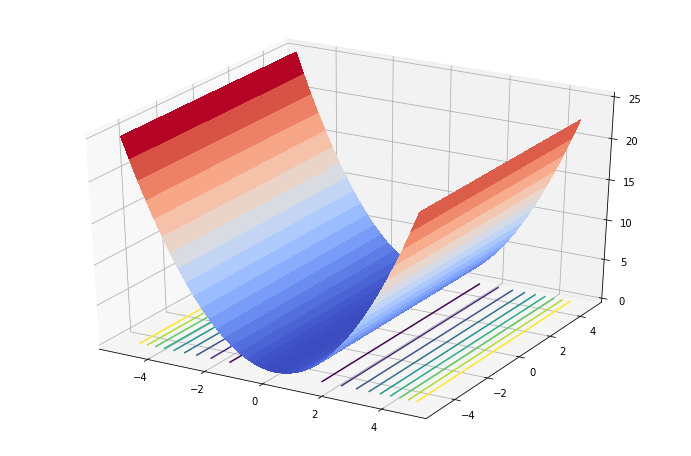

In [8]:
plot_2d(X,Y, func_2d_C(X,Y), 0)

This function does have a minimum at $(0,*)$, but it is not strict meaning that neighboring points are at the same level. Specifically, along the $x_1$ it is a strict minimum and along the $x_2$ direction the funtion is parallel to the axis. The Hessian of this function has only one eigenvalue $\lambda_1 = 2$.

## 3. The exercise

In this part, we will analyse the function

$$
f(x_1, x_2) = x_1^2 (4 - 2.1x_1^2 + \frac{1}{3}x_1^4) + x_1 x_2 + x_2^2(-4 + 4x_2^2)
$$

In [9]:
def func_3ex(x1, x2):
    f = x1**2*(4 - 2.1*x1**2 + 1/3*x1**4) + x1*x2 + x2**2*(-4+4*x2**2)
    return(f)

In [10]:
X1 = np.arange(-2, 2, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1, X2)

Let us first plot it in the range $x_1 \in [-2,2]$ and $x_2 \in [-1,1]$

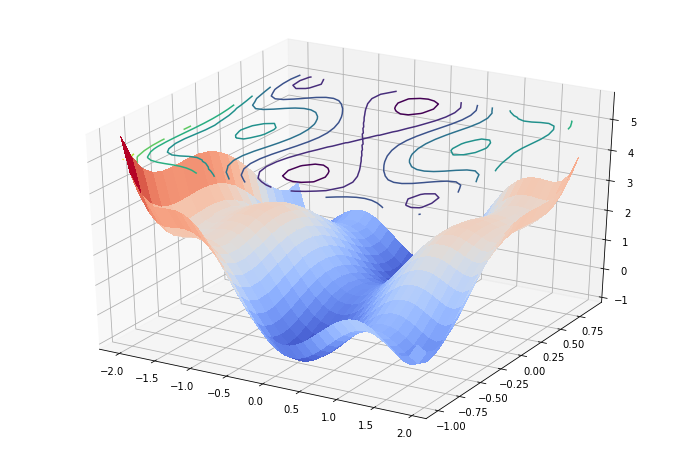

In [11]:
plot_2d(X1, X2, func_3ex(X1, X2),5)

One can see from the plot that the function has several optima, including saddle points, and local maxima and minima. Some of these local maxima/minima may also be global. We will investigate this in the next steps.

The gradient of this function is 

$$
\nabla f(x) = 
\begin{bmatrix}
8x_1-8.4x_1^3+2x_1^5 + x_2 \\
x_1 - 8x_2 + 16x_2^3.
\end{bmatrix}
$$

In order to find the points $x^*$ where the gradient vanishes we will compute numerical approximations for $\nabla f(x)$, i.e. find the minima of the norm of the gradient $||\nabla f(x)||^2$.

In [13]:
def grad_f(x1, x2):
    f1 = 8*x1 - 8.4*x1**3 + 2*x1**5 + x2 
    f2 = x1 - 8*x2 + 16*x2**3 
    return(np.r_[f1, f2])

def grad_norm2(x1, x2):
    return(np.dot(grad_f(x1,x2), grad_f(x1,x2)))

def grad_norm2_matrix(X,Y):
    x_len = X.shape[0]
    y_len = Y.shape[0]
    Z = np.zeros((x_len, y_len))
    for ix in range(x_len):
        for iy in range(y_len):
            Z[ix, iy] = grad_norm2(X[ix], Y[iy])
    return(Z)

### Evaluate $||\nabla f(x)||^2$ numerically

In [14]:
stepsize = 0.005
X = np.arange(-2,2 + stepsize,stepsize)
Y = np.arange(-1,1 + stepsize,stepsize)

# Z = ||\nabla f(x)||^2
Z = grad_norm2_matrix(X,Y)

Here we have computed a value for $||\nabla f(x)||^2$ for every value $x$ in the grid, and a stepsize of $0.005$. Next, we will check for all the points in the grid, whether a given point is a minimum of $||\nabla f(x)||^2$ among its neighboring points. 

### Brute force evaluation of the minima of $||\nabla f(x)||^2$

In [15]:
# This function checks whether a given point is a minimum among its neighbors
def is_minimum(ix_, iy_):
    append_point = True
    for ix_inner in range(ix_-1, ix_+2):
        for iy_inner in range(iy_-1, iy_+2):
            if Z[ix_inner, iy_inner] < Z[ix_, iy_]:
                append_point = False
    return(append_point)    

minima_indices = list()
minima_coord = list()
minima_grad_norm = list()
for ix in range(1, X.shape[0] - 1):
    for iy in range(1, Y.shape[0] - 1):
        if is_minimum(ix, iy):
            minima_indices.append((ix,iy))
            minima_coord.append((round(X[ix],4), round(Y[iy],4)))
            minima_grad_norm.append(round(Z[ix, iy],4))

The coordinates of the points where $||\nabla f(x)||^2$ has a strict minimum are:

In [16]:
minima_coord

[(-1.705, 0.795),
 (-1.64, -0.23),
 (-1.605, -0.57),
 (-1.295, -0.605),
 (-1.23, -0.16),
 (-1.11, 0.77),
 (-0.09, 0.715),
 (-0.0, 0.0),
 (0.09, -0.715),
 (1.11, -0.77),
 (1.23, 0.16),
 (1.295, 0.605),
 (1.605, 0.57),
 (1.64, 0.23),
 (1.705, -0.795)]

The value of $\nabla ||f(x)||^2$ at these points is:

In [17]:
minima_grad_norm

[0.0014,
 0.0007,
 0.0004,
 0.0,
 0.0002,
 0.0013,
 0.0015,
 0.0,
 0.0015,
 0.0013,
 0.0002,
 0.0,
 0.0004,
 0.0007,
 0.0014]

Note, that for all of these points the gradient is vanishing, but due to the finite step size of the brute force algorithm some values are not exactly zero. In order to figure out which of these points represents a minimum of $f(x)$ we procede with computing the Hessian.

### Analytical computation of the Hessian

The Hessian of $f(x)$ is given by

$$
\nabla^2 f(x) = 
\begin{bmatrix}
8 - 25.2 x_1^2 + 10 x_1^4 & 1 \\
1 & -8 + 48x_2^2
\end{bmatrix}
$$

In [18]:
def hessian_ex3(x_tuple):
    x1 = x_tuple[0]
    x2 = x_tuple[1]
    f1 = np.c_[8 - 25.2*x1**2 + 10*x1**4, 1]
    f2 = np.c_[1, -8 + 48*x2**2]
    return(np.r_[f1,f2])

In [19]:
def get_eigenvalues_from_hessian(coord, hessian_fct):
    hessian = hessian_fct((coord[0], coord[1]))
    eigenvalues = np.linalg.eigvals(hessian)
    return(eigenvalues)

In [20]:
def characterize_critical_point(coord,hessian_fct):
    evals = get_eigenvalues_from_hessian(coord, hessian_fct)
    if evals[0] > 0 and evals[1] > 0:
        property_ = "minimum"
    elif evals[0] < 0 and evals[1] < 0:
        property_ = "maximum"
    elif (evals[0] < 0 and evals[1] > 0) or (evals[0] > 0 and evals[1] < 0):
        property_ = "saddle point"

    if 'property_' in locals():
        print("The critical point", coord, "is a", property_)
    else:
        print("The critical point", coord, "is not defined")

In [21]:
for i in range(len(minima_coord)):
    characterize_critical_point(minima_coord[i], hessian_ex3)

The critical point (-1.705, 0.795) is a minimum
The critical point (-1.64, -0.23) is a saddle point
The critical point (-1.605, -0.57) is a minimum
The critical point (-1.295, -0.605) is a saddle point
The critical point (-1.23, -0.16) is a maximum
The critical point (-1.11, 0.77) is a saddle point
The critical point (-0.09, 0.715) is a minimum
The critical point (-0.0, 0.0) is a saddle point
The critical point (0.09, -0.715) is a minimum
The critical point (1.11, -0.77) is a saddle point
The critical point (1.23, 0.16) is a maximum
The critical point (1.295, 0.605) is a saddle point
The critical point (1.605, 0.57) is a minimum
The critical point (1.64, 0.23) is a saddle point
The critical point (1.705, -0.795) is a minimum


As a final note we are interested whether any of the minima are global minima for the given data range. To investigate this, we plug the coordinates of the minima into $f(x)$ and evaluate it.

In [24]:
indices_of_minima = [0, 2, 6, 8, 12, 14]
for j in indices_of_minima:
    point = func_3ex(minima_coord[j][0], minima_coord[j][1])
    print("f(x) at", minima_coord[j], "evaluates to", point)

f(x) at (-1.705, 0.795) evaluates to -0.2154305847706217
f(x) at (-1.605, -0.57) evaluates to 2.104275513364172
f(x) at (-0.09, 0.715) evaluates to -1.031583601353
f(x) at (0.09, -0.715) evaluates to -1.031583601353
f(x) at (1.605, 0.57) evaluates to 2.104275513364172
f(x) at (1.705, -0.795) evaluates to -0.2154305847706217


We conclude, that $(-0.09, 0.715)$ and $(0.09, -0.715)$ are global minima of $f(x)$ as stated in the lecture notes.